In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

import statsmodels.api as sm

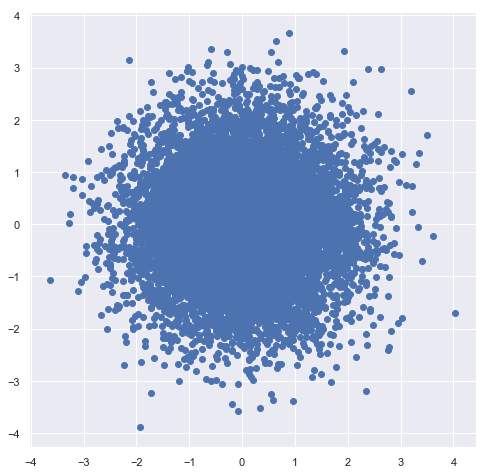

In [3]:
#ホワイトノイズ2つ
mean = 0
sigma = 1 
T = 10000

e1 = np.random.normal(mean, sigma, size=T)
e2 = np.random.normal(mean, sigma, size=T)

x = e1
y = e2

plt.figure(figsize=(8,8))
plt.scatter(x,y)

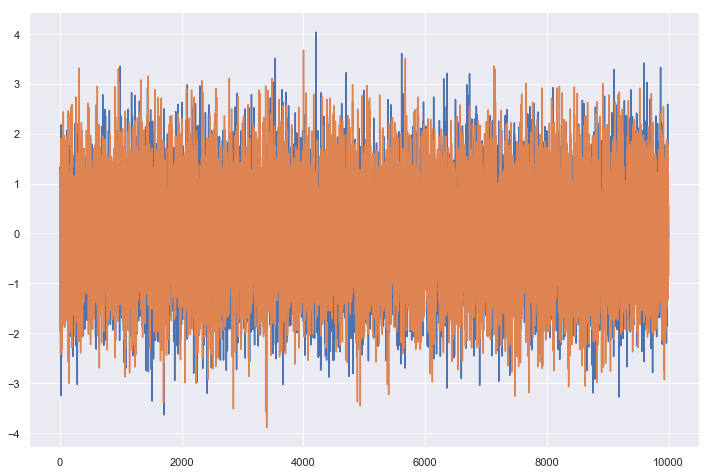

In [9]:
plt.figure(figsize=(12,8))
plt.plot(x)
plt.plot(y)

In [4]:
X = sm.add_constant(x)

model = sm.OLS(y, X)

results = model.fit()

results.summary()
#回帰係数は0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07821
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.780
Time:                        20:40:12   Log-Likelihood:                -14272.
No. Observations:               10000   AIC:                         2.855e+04
Df Residuals:                    9998   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.305e-05      0.010      0.007      0.994      -0.020       0.020
x1            -0.0028      0.010     -0.280      0.780      -0.022       0.017
==============================================================================
Omnibus:                        5.276   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.256
Skew:                           0.056   Prob(JB):                       0.0722
Kurtosis:                       3.013   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

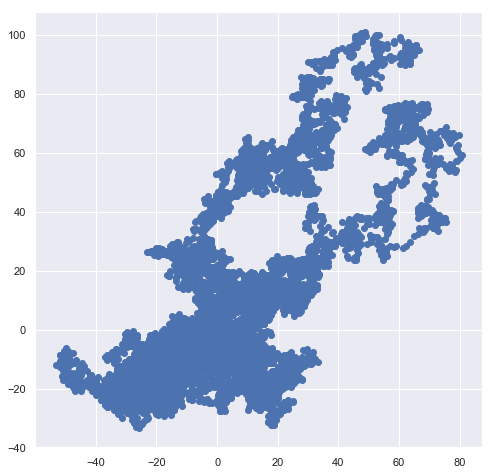

In [5]:
#ランダムウォーク2つ
mean = 0
sigma = 1 
T = 10000

e1 = np.random.normal(mean, sigma, size=T)
e2 = np.random.normal(mean, sigma, size=T)

random1 = np.zeros(T)
random1[0] = mean + e1[0]

for t in range(1, T):
    random1[t] = random1[t-1] + e1[t]
    
    
random2 = np.zeros(T)
random2[0] = mean + e2[0]

for t in range(1, T):
    random2[t] = random2[t-1] + e2[t]
    
# 回帰分析に使うデータの指定
x2 = random1
y2 = random2
    
plt.figure(figsize=(8,8))
plt.scatter(x2,y2)

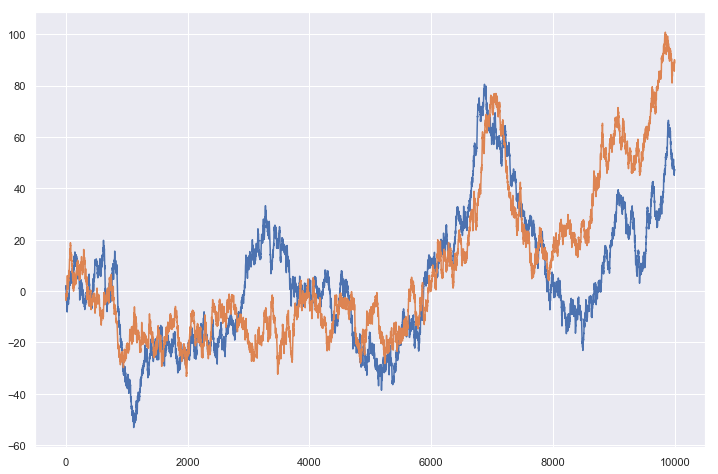

In [10]:
plt.figure(figsize=(12,8))
plt.plot(x2)
plt.plot(y2)

In [11]:
X = sm.add_constant(x2)

model = sm.OLS(y2, X)

results = model.fit()

results.summary()

#回帰係数が有意？

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        20:42:08   Log-Likelihood:                -44485.
No. Observations:               10000   AIC:                         8.897e+04
Df Residuals:                    9998   BIC:                         8.899e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2299      0.210     24.960      0.000       4.819       5.641
x1             0.8696      0.008    107.846      0.000       0.854       0.885
==============================================================================
Omnibus:                      226.249   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.348
Skew:                           0.379   Prob(JB):                     3.91e-53
Kurtosis:                       3.073   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

なぜ？

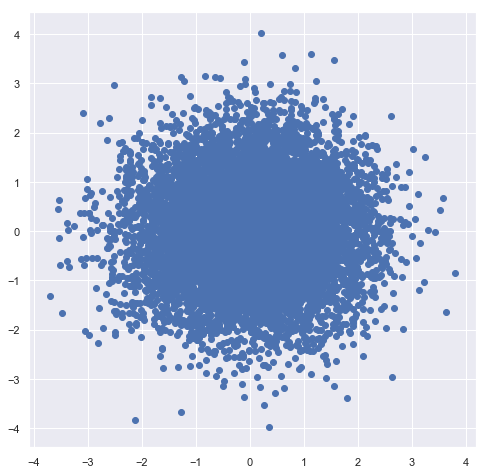

In [13]:
#差分ランダムウォーク2つ
x3 = np.diff(random1)
y3 = np.diff(random2)

plt.figure(figsize=(8,8))
plt.scatter(x3,y3)

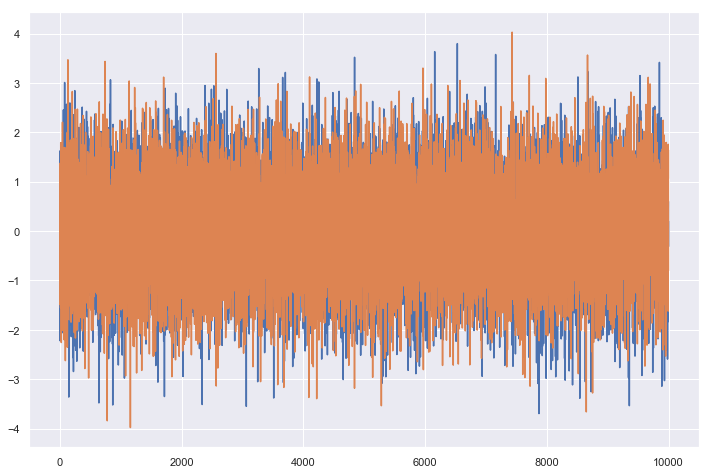

In [14]:
plt.figure(figsize=(12,8))
plt.plot(x3)
plt.plot(y3)

In [15]:
X = sm.add_constant(x3)

model = sm.OLS(y3, X)

results = model.fit()

results.summary()
#回帰係数が有意でない，単位根過程

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5498
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.458
Time:                        20:43:00   Log-Likelihood:                -14124.
No. Observations:                9999   AIC:                         2.825e+04
Df Residuals:                    9997   BIC:                         2.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.010      0.909      0.363      -0.010       0.029
x1             0.0073      0.010      0.741      0.458      -0.012       0.026
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.434
Skew:                          -0.011   Prob(JB):                        0.805
Kurtosis:                       2.976   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""